In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [35]:
final_df = pd.read_csv('final_df.csv')

In [38]:
final_df.drop('Unnamed: 0', axis = 1, inplace=True)

In [39]:
final_df

,Season,TeamID,Rank_WLK,Rank_DOL,Rank_COL,Rank_SAG,Rank_MOR,Rank_POM,Seed,TeamName,...,Stl_pg,Stl_Ag_pg,Blk,Blk_Ag,Blk_pg,Blk_Ag_pg,PF,PF_Ag,PF_pg,PF_Ag_pg
0,2003,1328,8,6,3,8,6,9,1,Oklahoma,...,6.933,5.167,113.0,80.0,3.767,2.667,558.0,526.0,18.600,17.533
1,2003,1448,9,4,8,9,20,12,2,Wake Forest,...,6.414,7.379,127.0,94.0,4.379,3.241,536.0,639.0,18.483,22.034
2,2003,1393,14,5,9,12,21,15,3,Syracuse,...,8.310,6.621,211.0,91.0,7.276,3.138,481.0,572.0,16.586,19.724
3,2003,1257,6,16,6,6,14,14,4,Louisville,...,7.200,5.767,142.0,73.0,4.733,2.433,680.0,678.0,22.667,22.600
4,2003,1280,17,19,25,16,8,11,5,Mississippi St,...,8.733,7.733,112.0,90.0,3.733,3.000,477.0,515.0,15.900,17.167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2021,1457,83,49,52,87,50,91,12,Winthrop,...,7.750,6.000,57.0,80.0,2.375,3.333,84.0,98.0,3.500,4.083
1193,2021,1317,78,88,85,84,94,71,13,North Texas,...,6.840,6.480,75.0,74.0,3.000,2.960,138.0,126.0,5.520,5.040
1194,2021,1159,10,16,14,67,41,84,14,Colgate,...,7.200,4.867,51.0,42.0,3.400,2.800,68.0,85.0,4.533,5.667
1195,2021,1331,151,150,181,152,130,151,15,Oral Roberts,...,6.217,5.565,94.0,71.0,4.087,3.087,184.0,177.0,8.000,7.696


<AxesSubplot:>

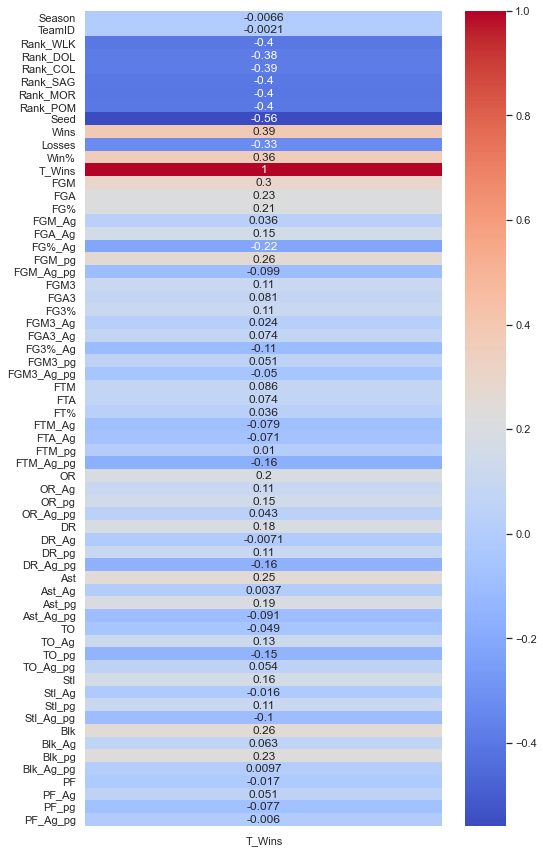

In [40]:
sns.set(rc = {'figure.figsize':(8,15)})
#plt.tight_layout
sns.heatmap(final_df.corr()[['T_Wins']], annot=True, cmap="coolwarm")


In [55]:
pd.set_option('display.max_rows', 70)
abs(final_df.corr()[['T_Wins']]).unstack().sort_values(ascending=False)

T_Wins  T_Wins        1.000000
        Seed          0.559499
        Rank_MOR      0.404542
        Rank_SAG      0.397819
        Rank_WLK      0.395318
        Rank_POM      0.395260
        Wins          0.386746
        Rank_COL      0.385089
        Rank_DOL      0.383308
        Win%          0.356077
        Losses        0.325032
        FGM           0.296579
        FGM_pg        0.259955
        Blk           0.255162
        Ast           0.251021
        Blk_pg        0.228563
        FGA           0.225063
        FG%_Ag        0.218186
        FG%           0.209133
        OR            0.195227
        Ast_pg        0.192808
        DR            0.184166
        FTM_Ag_pg     0.164096
        DR_Ag_pg      0.162409
        Stl           0.161419
        FGA_Ag        0.154452
        OR_pg         0.150657
        TO_pg         0.146721
        TO_Ag         0.128066
        FGM3          0.108611
        FG3%_Ag       0.108187
        DR_pg         0.107248
        

###### Most correlated features to tournament wins are general stats like seeds, ranking systems, and regular season record.
###### Regular season stats are less predictive. the Field Goals category (total, %, per game) had the highghest correlation to tournament wins.
###### Stat categories such as 3-pointers, Free Throws and Rebounds were not highly correlated.

<AxesSubplot:xlabel='T_Wins', ylabel='OrdinalRank_POM'>

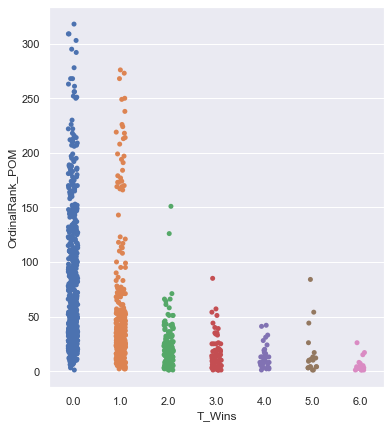

In [30]:
sns.set(rc = {'figure.figsize':(6,)})
sns.stripplot(data=final_df, x = 'T_Wins', y='OrdinalRank_POM')

In [57]:
pd.set_option('display.max_rows', 10)
final_four = final_df[final_df['T_Wins']>=4]
not_final_four = final_df[final_df['T_Wins']<4]

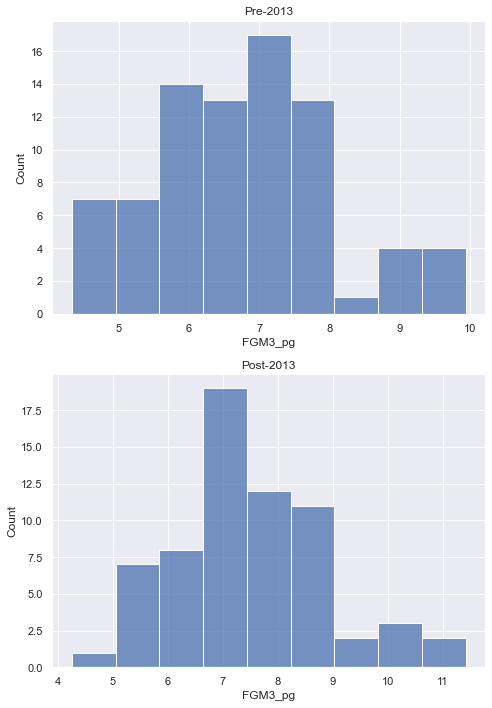

In [82]:
sns.set()
fig, axes = plt.subplots(2, 1, figsize=(7,10))
axes[0].title.set_text('Pre-2013')
axes[1].title.set_text('Post-2013')
sns.histplot(ax=axes[0], x = final_df[(final_df['T_Wins']>=3) & (final_df['Season']<2013)]['FGM3_pg'], bins=9)
sns.histplot(ax=axes[1], x = final_df[(final_df['T_Wins']>=3) & (final_df['Season']>=2013)]['FGM3_pg'], bins=9)
fig.tight_layout()

In [83]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 65 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      1197 non-null   int64  
 1   TeamID      1197 non-null   int64  
 2   Rank_WLK    1197 non-null   int64  
 3   Rank_DOL    1197 non-null   int64  
 4   Rank_COL    1197 non-null   int64  
 5   Rank_SAG    1197 non-null   int64  
 6   Rank_MOR    1197 non-null   int64  
 7   Rank_POM    1197 non-null   int64  
 8   Seed        1197 non-null   int64  
 9   TeamName    1197 non-null   object 
 10  Wins        1197 non-null   int64  
 11  Losses      1197 non-null   int64  
 12  Win%        1197 non-null   float64
 13  T_Wins      1197 non-null   float64
 14  FGM         1197 non-null   float64
 15  FGA         1197 non-null   float64
 16  FG%         1197 non-null   float64
 17  FGM_Ag      1197 non-null   float64
 18  FGA_Ag      1197 non-null   float64
 19  FG%_Ag      1197 non-null  